In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset1.csv')
data2 = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset2.csv")
data3 = pd.read_csv("E:\\AUT\\Machine Learning\\PML_HW3\\DataSet\\4\\dataset3.csv")

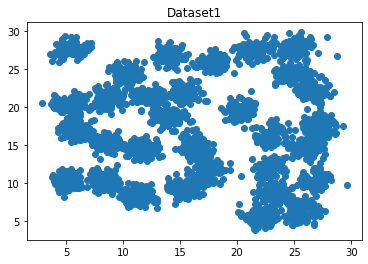

In [3]:
plt.scatter(data1['x'],data1['y'])
plt.title("Dataset1")
plt.show()

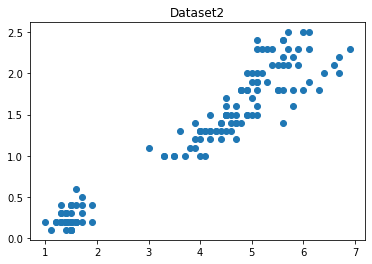

In [4]:
plt.scatter(data2['x'],data2['y'])
plt.title("Dataset2")
plt.show()

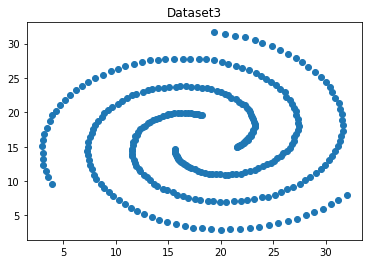

In [5]:
plt.scatter(data3['x'],data3['y'])
plt.title("Dataset3")
plt.show()

In [6]:
#Encoding categorical data values dataset2 
from sklearn.preprocessing import LabelEncoder
labelencoder_label = LabelEncoder()
data2.label= labelencoder_label.fit_transform(data2.label)
print(labelencoder_label.fit_transform(data2.label))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
X1=data1.copy()
X2=data2.copy()
X3=data3.copy()

In [8]:
from sklearn import preprocessing
X1_scaled=preprocessing.scale(X1)

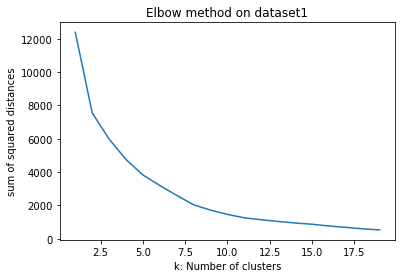

In [9]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,20):
    kmeans=KMeans(i)
    kmeans.fit(X1_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.xlabel('k: Number of clusters')
plt.ylabel('sum of squared distances')
plt.title('Elbow method on dataset1')
plt.show()

In [10]:
kmeans_new=KMeans(8)
kmeans.fit(X1_scaled)
cluster_new=X1.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(X1_scaled)

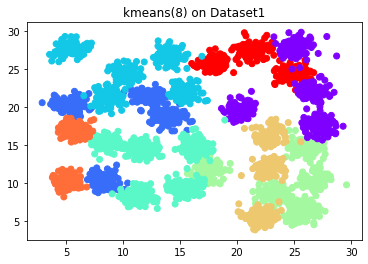

In [11]:
plt.scatter(cluster_new['x'],cluster_new['y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.title("kmeans(8) on Dataset1")
plt.show()

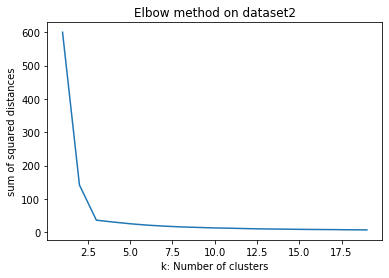

In [12]:
from sklearn import preprocessing
X2_scaled=preprocessing.scale(X2)
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,20):
    kmeans=KMeans(i)
    kmeans.fit(X2_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.xlabel('k: Number of clusters')
plt.ylabel('sum of squared distances')
plt.title('Elbow method on dataset2')
plt.show()

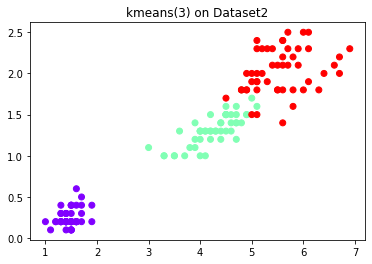

In [13]:
kmeans_new=KMeans(3)
kmeans.fit(X2_scaled)
cluster_new=X2.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(X2_scaled)
plt.scatter(cluster_new['x'],cluster_new['y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.title("kmeans(3) on Dataset2")
plt.show()

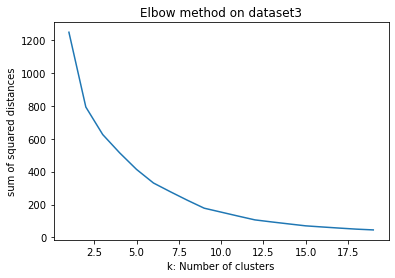

In [14]:
from sklearn import preprocessing
X3_scaled=preprocessing.scale(X3)
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,20):
    kmeans=KMeans(i)
    kmeans.fit(X3_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.xlabel('k: Number of clusters')
plt.ylabel('sum of squared distances')
plt.title('Elbow method on dataset3')
plt.show()

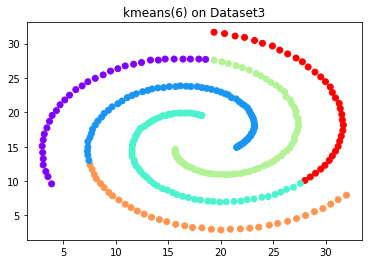

In [15]:
kmeans_new=KMeans(6)
kmeans.fit(X3_scaled)
cluster_new=X3.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(X3_scaled)
plt.scatter(cluster_new['x'],cluster_new['y'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.title("kmeans(6) on Dataset3")
plt.show()

In [16]:
from sklearn import metrics
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [17]:
X1_df = data1.drop("label",axis = 1) #feature matrix
Y1_df = data1["label"] #Target vector
X1_df = np.array(X1_df)
Y1_df = np.array(Y1_df)

purity = 0

for k in range(1,10) :
    kmeans = KMeans(n_clusters=8, init ='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X1_scaled)
    purity = purity_score(Y1_df, pred_y)
    purity=+purity
print(purity)

0.25806451612903225


In [18]:
X2_df = data2.drop("label",axis = 1) #feature matrix
Y2_df = data2["label"] #Target vector
X2_df = np.array(X2_df)
Y2_df = np.array(Y2_df)

purity = 0

for k in range(1,10) :
    kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X2_scaled)
    purity = purity_score(Y2_df, pred_y)
    purity=+purity
print(purity)

1.0


In [19]:
X3_df = data3.drop("label",axis = 1) #feature matrix
Y3_df = data3["label"] #Target vector
X3_df = np.array(X3_df)
Y3_df = np.array(Y3_df)

purity = 0

for k in range(1,10) :
    kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(X3_scaled)
    purity = purity_score(Y3_df, pred_y)
    purity=+purity
print(purity)

1.0
